In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
#imports the own created package
import clustering as cl
import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


## Team Results of actual Season Top Leagues: Germany, Italy, France, England and Spain

In [2]:
def country_df(csv):
    df = pd.read_csv(csv)
    df.sort_values('team_name', inplace=True)
    df.reset_index(inplace=True)
    df.drop("index", axis=1, inplace=True)
    return df

In [3]:
df_france = country_df("top_leagues_teams_stats/france-ligue-1-teams-2019-to-2020-stats.csv")
df_germany = country_df("top_leagues_teams_stats/germany-bundesliga-teams-2019-to-2020-stats.csv")
df_england = country_df("top_leagues_teams_stats/england-premier-league-teams-2019-to-2020-stats.csv")
df_italy = country_df("top_leagues_teams_stats/italy-serie-a-teams-2019-to-2020-stats.csv")
df_spain = country_df("top_leagues_teams_stats/spain-la-liga-teams-2019-to-2020-stats.csv")

## Match Data from League Climbers

In [ ]:
# ALLE AUFSTEIGER DIE IN SAISON 20/21 DABEI SIND

2018 - 2019

In [5]:
# df_teams_last_first = pd.read_csv("top_leagues_teams_stats/germany-bundesliga-teams-2018-to-2019-stats.csv")

In [6]:
# df_nueremberg = df_teams_last_first[df_teams_last_first['common_name'] == 'Nürnberg']
# df_hannover = df_teams_last_first[df_teams_last_first['common_name'] == 'Hannover 96']
# df_stuttgart = df_teams_last_first[df_teams_last_first['common_name'] == 'Stuttgart']

2017 - 2018

In [7]:
# df_teams_last_17_18 = pd.read_csv("top_leagues_teams_stats/germany-bundesliga-teams-2017-to-2018-stats.csv")

In [8]:
# df_hsv = df_teams_last_17_18[df_teams_last_17_18['common_name'] == 'Hamburger SV']

2016 - 2017

In [9]:
# df_teams_last_16_17 = pd.read_csv("top_leagues_teams_stats/germany-bundesliga-teams-2016-to-2017-stats.csv")

In [10]:
# df_darmstadt = df_teams_last_16_17[df_teams_last_16_17['common_name'] == 'Darmstadt 98']
# df_ingolstadt = df_teams_last_16_17[df_teams_last_16_17['common_name'] == 'Ingolstadt']

## Concat all Df's

In [12]:
df_all = pd.concat([df_germany, df_england, df_italy, df_spain, df_france],sort=False)
df_all.reset_index(inplace=True)
df_all.drop("index", axis=1, inplace=True)
df_european_leagues = df_all.copy()

In [ ]:
# df_league_climbers = pd.concat([df_nueremberg, df_hannover, df_stuttgart, df_hsv, df_darmstadt, df_ingolstadt],sort=False)
# df_league_climbers.reset_index(inplace=True)
# df_league_climbers.drop("index", axis=1, inplace=True)
# df_all_climbers = df_league_climbers.copy()
# columns = ['wins', 'wins_home', 'wins_away', 'draws', 'draws_home', 'draws_away', 'losses', 'losses_home', 'losses_away']

In [13]:
# df_all = pd.concat([df_european_leagues, df_all_climbers],sort=False)
# df_all.reset_index(inplace=True)
# df_all.drop("index", axis=1, inplace=True)
# df_total = df_all.copy()

In [14]:
# COMMENT OUT IF YOU WANT AA WITHOUT CLIMBERS
df_total = df_european_leagues.copy()

In [15]:
df_total.shape

(98, 280)

In [16]:
from pandas.plotting import scatter_matrix

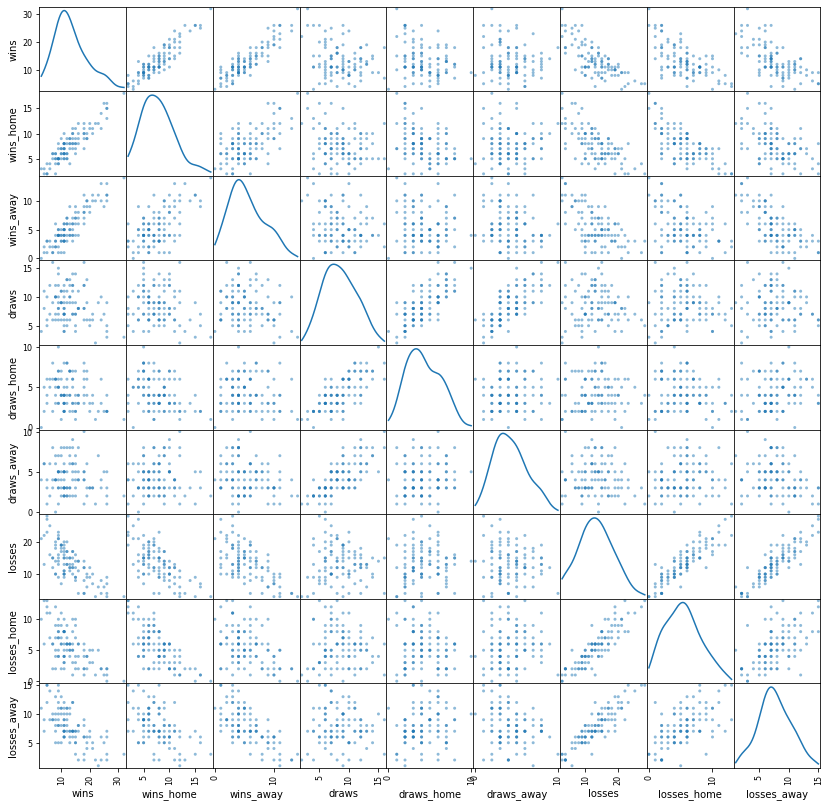

In [17]:
scatter_matrix(df_total[df_total.iloc[:,8:17].columns], diagonal='kde', figsize=(14,14));

## Build the matrix

In [18]:
df_all.set_index("team_name", inplace=True)
df_all = df_all.T

In [19]:
df_teams_numerical = df_all.iloc[8:,:]

In [20]:
df_norm = (df_teams_numerical - df_teams_numerical.min()) / (df_teams_numerical.max() - df_teams_numerical.min())

In [21]:
X = df_norm.to_numpy()

## AA Analysis

In [22]:
archetypal=cl.clustering.ArchetypalAnalysis(n_archetypes=5,iterations=50,tmax=300)
archetypal.fit(X)

Z=(archetypal.archetypes())

RSS = 3.363080470165209
RSS = 2.931670271727097
RSS = 2.7491836250337505
RSS = 2.6647273571160213
RSS = 2.6420822241041426
RSS = 2.6325846181720145
RSS = 2.626440326605169
RSS = 2.6210788392721143
RSS = 2.61580190629749
RSS = 2.610416293307934
RSS = 2.604393284693678
RSS = 2.5996056620871264
RSS = 2.594022640241503
RSS = 2.5882933615827186
RSS = 2.582334105602427
RSS = 2.574685495174517
RSS = 2.562220025749966
RSS = 2.5472419376780584
RSS = 2.535525237606037
RSS = 2.5269528891557744
RSS = 2.52107006813913
RSS = 2.517689017702831
RSS = 2.5156089941319237
RSS = 2.5138528931824458
RSS = 2.512803805104297
RSS = 2.5120365839830785
RSS = 2.5116078261146897
RSS = 2.511263017150333
RSS = 2.5110714413959867
RSS = 2.5107798224808056
RSS = 2.5106652439507418
RSS = 2.510542361194742
RSS = 2.510509566200388
RSS = 2.510463957678776
RSS = 2.51041040160385
RSS = 2.510387173300327
RSS = 2.510414980293756
RSS = 2.510422481038969
RSS = 2.51033432633649
RSS = 2.5103558453556034
RSS = 2.5103444195582267
RS

In [23]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)})
sns.set_context('talk', rc={ 'lines.linewidth': 6}, font_scale=1.5)

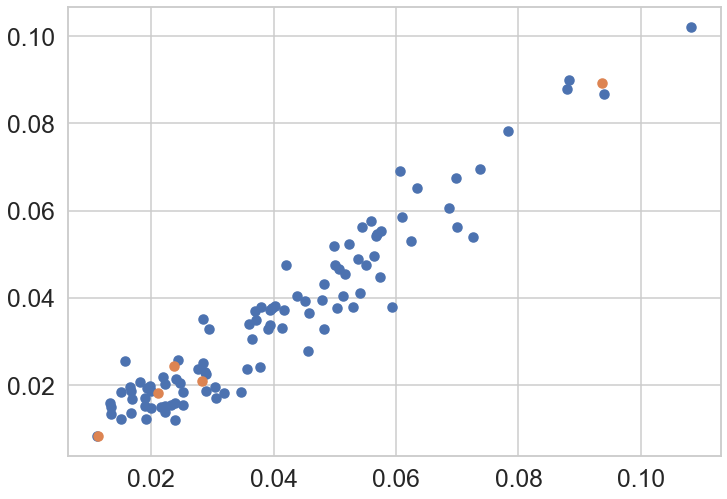

In [24]:
plt.scatter(X[0,:],X[1,:])
plt.scatter(np.array(Z[0,:]),np.array(Z[1,:]))
plt.show()

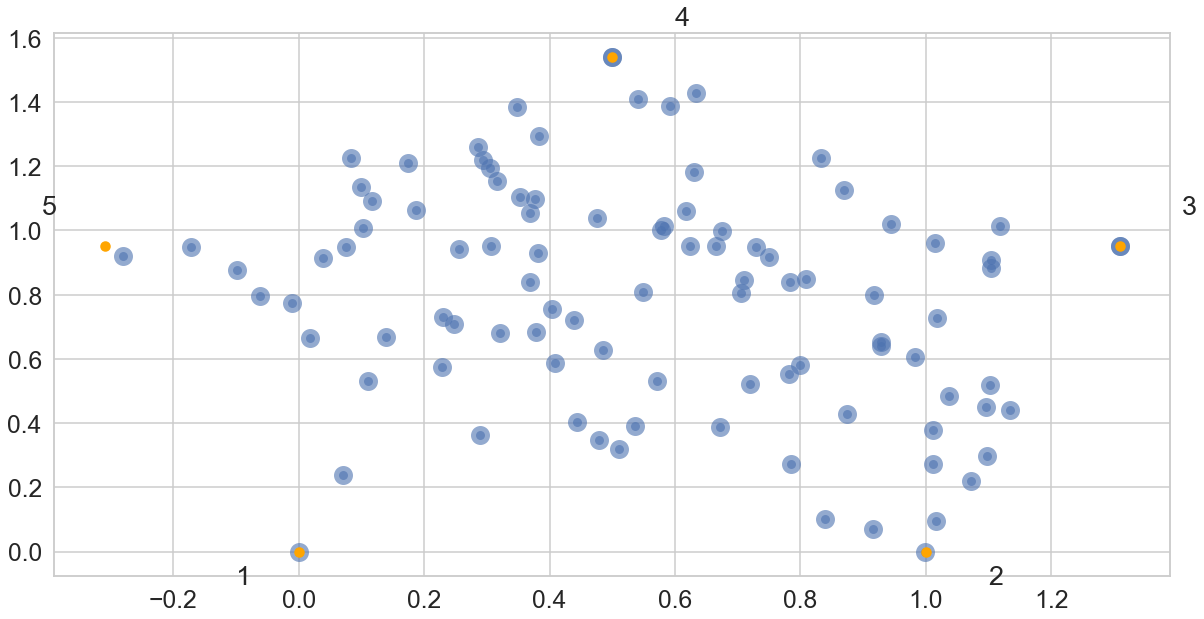

In [25]:
A=archetypal.transform(X)
dp=archetypal.map2D
dat=dp @ A

f, ax = plt.subplots(figsize=(20, 10))
ax=cl.clustering.archetypal_plot(ax,dat,dp,epsilon=.1)
ax.set_aspect('auto')
plt.show()

## Create data labels

In [26]:
teamsList = df_total['team_name']
temasColumnOrdering={x:y for y,x in enumerate(teamsList)}
labels={v: k for k, v in temasColumnOrdering.items()}

In [27]:
for i in range(0,104):
    print("{:40}".format(labels[i]),end='')
    for j in A[:,i]:
        print("{:.3f} ".format(j),end='')
    print("")

1. FC Köln                              0.000 0.000 0.380 0.000 0.619 
1. FC Union Berlin                      0.304 0.035 0.405 0.000 0.256 
1. FSV Mainz 05                         0.000 0.000 0.408 0.152 0.439 
BVB 09 Borussia Dortmund                0.000 0.073 0.068 0.859 0.000 
Bayer 04 Leverkusen                     0.000 0.107 0.000 0.587 0.307 
Borussia VfL Mönchengladbach            0.054 0.097 0.000 0.435 0.414 
Düsseldorfer TuS Fortuna 1895           0.000 0.000 0.716 0.118 0.166 
Eintracht Frankfurt                     0.000 0.000 0.213 0.348 0.439 
FC Augsburg                             0.000 0.082 0.550 0.075 0.293 
FC Bayern München                       0.000 0.000 0.000 1.000 0.000 
FC Schalke 04                           0.000 0.168 0.507 0.097 0.228 
Hertha BSC                              0.253 0.000 0.295 0.000 0.451 
Rasen Ballsport Leipzig                 0.000 0.000 0.177 0.811 0.012 
SC Freiburg                             0.000 0.217 0.130 0.535 0.118 
SC Pad

KeyError: 98

## Merge Result with original dataframe

In [ ]:
df_aa_result = pd.DataFrame(data=A.T)
df_aa_result.columns = df_aa_result.columns.map(str)

In [ ]:
df_teams_with_aa = pd.concat([df_total, df_aa_result], axis=1)
df_teams_only_aa = df_teams_with_aa.iloc[:,280:]
df_teams_only_aa['common_name'] = df_teams_with_aa['common_name']

In [ ]:
df_teams_only_aa

## Save Result as Pickle file

In [ ]:
# df_teams_only_aa.to_pickle("pickle_files/df_teams_only_aa.pkl")